# SYS 611: Queuing Markov Process Model

Paul T. Grogan <pgrogan@stevens.edu>

This example constructs a Markov process model for a single-server queuing system.

## Dependencies

This example is compatible with Python 2 environments through use of the `__future__` library function. Additionally, this example uses the `numpy` and `matplotlib.pyplot` libraries.

In [1]:
# import the python3 behavior for importing, division, and printing in python2
from __future__ import absolute_import, division, print_function

# import the numpy package and refer to it is `np`
import numpy as np
# import the matplotlib pyplot package and refer to it is `plt`
import matplotlib.pyplot as plt

## Process Generators

The two process generators that are required to model a simple queuing system are the inter-arrival (time between customer arrivals) and service duration. To comply with the Markov model assumptions, both are represented here as exponentially-distributed random variables.

In [15]:
_lambda = 1/1.5 # arrival rate, 1.5 minutes per customer or 2/3 customer per minute
_mu = 1/0.75 # service rate, 0.75 minutes per customer or 4/3 customer per minute

# define process generator for inter-arrival duration
def gen_t_arrival():
    r = np.random.rand()
    return -np.log(1-r)/_lambda
    """
    # alternatively, this function could be replaced by the following:
    return np.random.exponential(scale=1/_lambda)
    """

# define process generator for service duration
def gen_t_service():
    r = np.random.rand()
    return -np.log(1-r)/_mu
    """
    # alternatively, this function could be replaced by the following:
    return np.random.exponential(scale=1/_mu)
    """

## State Transition Function

The state transition function processes the model logic based on inter-arrival and service duration samples. This function returns the next state value and the elapsed time (`delta_t`) for recording purposes.

In [13]:
def _delta(q, t_arrival, t_service):
    # process state transitions / updates for q and t
    if q == 0 or t_arrival < t_service:
        # if no customers in queue or arrival happens before service
        # event is an arrival
        delta_t = t_arrival
        return q + 1, delta_t
    else:
        # otherwise event is a service
        delta_t = t_service
        return q - 1, delta_t

## Simulation

Generate a state trajectory for a specified number of state transitions.

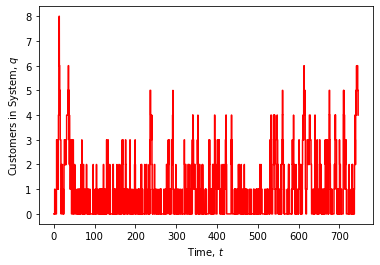

         i      t(i)      q(i) t_arrival t_service   delta_t    q(i+1)
         0      0.00         0      2.15      0.27      2.15         1
         1      2.15         1      1.40      0.39      0.39         0
         2      2.54         0      3.90      0.99      3.90         1
         3      6.44         1      1.54      0.07      0.07         0
         4      6.51         0      0.08      0.46      0.08         1
         5      6.59         1      0.24      0.45      0.24         2
         6      6.83         2      0.04      0.19      0.04         3
         7      6.86         3      5.50      2.09      2.09         2
         8      8.95         2      0.08      1.44      0.08         3
         9      9.04         3      1.51      0.34      0.34         2
        10      9.37         2      0.04      0.44      0.04         3
        11      9.41         3      4.23      0.01      0.01         2
        12      9.43         2      0.77      0.31      0.31         1
      

In [14]:
# define the number of events
NUM_EVENTS = 1000

# create lists to store variables of interest
t = np.zeros(NUM_EVENTS+1) # time
q = np.zeros(NUM_EVENTS+1) # number of customers in system
t_arrival = np.zeros(NUM_EVENTS) # sampled inter-arrival durations
t_service = np.zeros(NUM_EVENTS) # sampled service durations
delta_t = np.zeros(NUM_EVENTS) # duration of each event

# initialize time and state variables
t[0] = 0
q[0] = 0

for i in range(NUM_EVENTS):
    # generate samples for inter-arrival and service durations
    t_arrival[i] = gen_t_arrival()
    t_service[i] = gen_t_service()
    # process the state transition and record results
    q[i+1], delta_t[i] = _delta(q[i], t_arrival[i], t_service[i])
    # advance the time
    t[i+1] = t[i] + delta_t[i]

# plot the state trajectory
plt.figure()
plt.xlabel('Time, $t$')
plt.ylabel('Customers in System, $q$')
plt.step(t,q,'-r',where='post')
plt.show()
    
# print out a table of the state and input trajectory
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
        'i', 't(i)', 'q(i)', 't_arrival', 't_service', 'delta_t', 'q(i+1)'))
for i in range(NUM_EVENTS):
    print('{:10.0f}{:10.2f}{:10.0f}{:10.2f}{:10.2f}{:10.2f}{:10.0f}'.format(
            i, t[i], q[i], t_arrival[i], t_service[i], delta_t[i], q[i+1]))